In [1]:
%matplotlib inline 

In [2]:
# KNN Classifer
# The KNN algorithm assumes that similar things exist in close proximity. 
# In other words, similar things are near to each other.


# We will use the "iris" dataset provided by the datasets of the sklearn module.

# The data set consists of 50 samples from each of three species of Iris

# Iris setosa,
# Iris virginica and
# Iris versicolor.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
iris_Desc = iris.DESCR

In [3]:
np.random.seed(42)
indices = np.random.permutation(len(iris_data)) 
n_training_samples = 12
learnset_data=iris_data[indices[:-n_training_samples]]
learnset_labels=iris_labels[indices[:-n_training_samples]]
testset_data=iris_data[indices[-n_training_samples:]]
testset_labels=iris_labels[indices[-n_training_samples:]]
print(learnset_data[:4], learnset_labels[:4])

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]] [1 0 2 1]


In [30]:
# The following code is only necessary to visualize the data of our learnset. Our 
# data consists of four values per iris item, so we will reduce the data to three 
# values by summing up the third and fourth value. This way, we are capable of
# depicting the data in 3-dimensional space:

X=[]
for iclass in range(3):
  X.append([[],[],[]]) #first dimension is the page
  for i in range(len(learnset_data)):
    if learnset_labels[i]==iclass:
      X[iclass][0].append(learnset_data[i][0])
      X[iclass][1].append(learnset_data[i][1])
      X[iclass][2].append(sum(learnset_data[i][2:]))
colours=("b","r","k")
np.shape(X[0][0][:])



(48,)

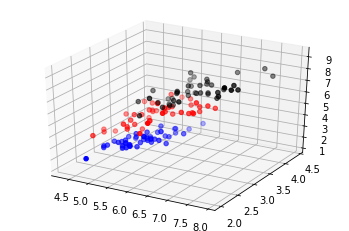

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

for iclass in range(3):
  ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()


In [28]:
# To determine the similarity between two instances, 
# we need a distance function. In our example, the Euclidean distance is ideal
def distance(instance1,instance2):
    instance1=np.array(instance1) #type should be array
    instance2=np.array(instance2)
    return np.linalg.norm(instance1-instance2)
# print (learnset_data[1])
print (distance(learnset_data[1], learnset_data[15]))

3.361547262794322


In [40]:
# The function 'get_neighbors returns a list with 'k' neighbors,
# which are closest to the instance 'test_instance'
def get_neighbors(training_set,
                 labels,
                 test_instance,
                 k):
    
    distances=[];
    print(len(training_set))
    for index in range(len(training_set)):
        dist = distance(training_set[index],test_instance)
        distances.append((training_set[index],dist,labels[index]))
    distances.sort(key=lambda x:x[1]) #sorting based on the distances
    neighbors=distances[:k]
    return neighbors
            

In [42]:
for i in range(5):
    neighbors = get_neighbors(learnset_data,
                             learnset_labels,
                             testset_data[i],
                             3)
    print(i,
          testset_data[i],
         testset_labels[i],
         neighbors)

138
0 [5.7 2.8 4.1 1.3] 1 [(array([5.7, 2.9, 4.2, 1.3]), 0.14142135623730995, 1), (array([5.6, 2.7, 4.2, 1.3]), 0.17320508075688815, 1), (array([5.6, 3. , 4.1, 1.3]), 0.22360679774997935, 1)]
138
1 [6.5 3.  5.5 1.8] 2 [(array([6.4, 3.1, 5.5, 1.8]), 0.1414213562373093, 2), (array([6.3, 2.9, 5.6, 1.8]), 0.24494897427831783, 2), (array([6.5, 3. , 5.2, 2. ]), 0.3605551275463988, 2)]
138
2 [6.3 2.3 4.4 1.3] 1 [(array([6.2, 2.2, 4.5, 1.5]), 0.2645751311064586, 1), (array([6.3, 2.5, 4.9, 1.5]), 0.574456264653803, 1), (array([6. , 2.2, 4. , 1. ]), 0.5916079783099617, 1)]
138
3 [6.4 2.9 4.3 1.3] 1 [(array([6.2, 2.9, 4.3, 1.3]), 0.20000000000000018, 1), (array([6.6, 3. , 4.4, 1.4]), 0.2645751311064587, 1), (array([6.6, 2.9, 4.6, 1.3]), 0.3605551275463984, 1)]
138
4 [5.6 2.8 4.9 2. ] 2 [(array([5.8, 2.7, 5.1, 1.9]), 0.3162277660168375, 2), (array([5.8, 2.7, 5.1, 1.9]), 0.3162277660168375, 2), (array([5.7, 2.5, 5. , 2. ]), 0.33166247903553986, 2)]
